<a href="https://colab.research.google.com/github/alexandergribenchenko/Data_Science_Toolkit/blob/main/Pipelines/Notebook_insumo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. Librerias necesarias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score

import pickle

# 01. Lectura del dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('data/BPT_POC_Data.csv')
df

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,1,12,814,UA,134.0,0.0,0,679.0
1,1,12,830,DL,90.0,0.0,0,214.0
2,1,1,1835,UA,213.0,0.0,0,1605.0
3,1,4,1730,AA,80.0,0.0,0,235.0
4,1,7,1442,UA,103.0,0.0,0,413.0
...,...,...,...,...,...,...,...,...
5995,0,6,1725,AA,115.0,17.0,30,597.0
5996,0,9,1945,DL,127.0,-19.0,-9,752.0
5997,0,8,1850,DL,101.0,6.0,-4,481.0
5998,0,7,1720,AA,210.0,178.0,42,1302.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Canceled          6000 non-null   int64  
 1   Month             6000 non-null   int64  
 2   DepartureTime     6000 non-null   int64  
 3   UniqueCarrier     6000 non-null   object 
 4   SchedElapsedTime  5998 non-null   float64
 5   ArrDelay          5999 non-null   float64
 6   DepDelay          6000 non-null   int64  
 7   Distance          5999 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 375.1+ KB


# 02. Train - Test Split

In [ ]:
X = df.drop('Canceled', axis=1)
y = df['Canceled']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=0)

# 03. Pipelines

## 03.01. Pipeline preprocesamiento: definición

###  Pipeline numerical

In [ ]:
df.head(3)

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,1,12,814,UA,134.0,0.0,0,679.0
1,1,12,830,DL,90.0,0.0,0,214.0
2,1,1,1835,UA,213.0,0.0,0,1605.0


In [ ]:
numeric_features = ['SchedElapsedTime', 'ArrDelay', 'DepDelay', 'Distance']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer()),
    ('feature_extraction', PCA(n_components=2))])

### Pipeline categorical

In [ ]:
categorical_features = ['UniqueCarrier', 'Month']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

### Pipeline preprocesamiento consolidado

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

## 03.02. Pipeline preprocesamiento: entrenamiento e implementación

In [ ]:
X_transformado = preprocessor.fit_transform(X)
X_transformado.shape

(6000, 17)

In [ ]:
type(X_transformado)

scipy.sparse._csr.csr_matrix

In [ ]:
print(X_transformado)

  (0, 0)	-0.6784433301688055
  (0, 1)	0.005733064767263504
  (0, 4)	1.0
  (0, 16)	1.0
  (1, 0)	-1.4145984265297613
  (1, 1)	0.4835528113032305
  (1, 3)	1.0
  (1, 16)	1.0
  (2, 0)	0.72202070617343
  (2, 1)	-0.9034685645125988
  (2, 4)	1.0
  (2, 5)	1.0
  (3, 0)	-1.4724410203421014
  (3, 1)	0.5208249317373901
  (3, 2)	1.0
  (3, 8)	1.0
  (4, 0)	-1.14385789706446
  (4, 1)	0.3076896308378672
  (4, 4)	1.0
  (4, 11)	1.0
  (5, 0)	-0.7811930159112707
  (5, 1)	0.07205695174711181
  (5, 3)	1.0
  (5, 6)	1.0
  (6, 0)	-1.5665756893439633
  :	:
  (5993, 7)	1.0
  (5994, 0)	8.393844045235383
  (5994, 1)	-4.8449847309036205
  (5994, 2)	1.0
  (5994, 16)	1.0
  (5995, 0)	-0.3427317769992929
  (5995, 1)	0.9868661428609207
  (5995, 2)	1.0
  (5995, 10)	1.0
  (5996, 0)	-0.9806636572213542
  (5996, 1)	-0.48594001762014927
  (5996, 3)	1.0
  (5996, 13)	1.0
  (5997, 0)	-1.0864369316406153
  (5997, 1)	0.30523371656262266
  (5997, 3)	1.0
  (5997, 12)	1.0
  (5998, 0)	2.8375182424069245
  (5998, 1)	3.038729602218328
  

## 03.03. Pipeline preprocesamiento y estimación: definición

In [ ]:
pipeline_full = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier(p=2))])

## 03.04. Pipeline preprocesamiento y estimación: entrenamiento e implementación

In [ ]:
pipeline_full.fit(X_train, y_train)
print(f'Test accuracy: {pipeline_full.score(X_test, y_test)*100}%')

Test accuracy: 84.91666666666666%


In [ ]:
y_pred = pipeline_full.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1002
           1       0.55      0.51      0.52       198

    accuracy                           0.85      1200
   macro avg       0.73      0.71      0.72      1200
weighted avg       0.84      0.85      0.85      1200



In [ ]:
def ordered_confusion_matrix(input_true, input_pred):
  tn, fp, fn, tp = confusion_matrix(input_true, input_pred).ravel()
  ordered_cm = np.array([[tp,fn], [fp,tn]])
  ordered_cm
  x_axis_labels = ['Positive','Negative'] # labels for x-axis
  y_axis_labels = ['Positive','Negative'] # labels for y-axis

  # create seabvorn heatmap with required labels
  ax = sns.heatmap(ordered_cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap='coolwarm', annot=True)
  ax.set_ylabel('Real Label', size=25)
  ax.set_xlabel( 'Predicted Label', size=25)
  # ax.xaxis.tick_top()
  ax.xaxis.set_ticks_position('top')
  ax.xaxis.set_label_position('top')

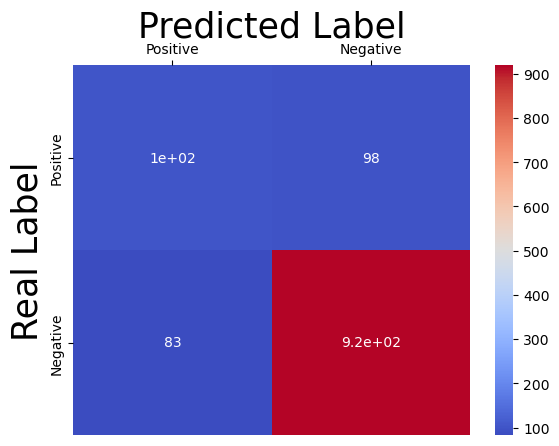

In [ ]:
ordered_confusion_matrix(y_test, y_pred)

# 04. Save model

In [ ]:
path = 'pipelines/model.pkl'

In [ ]:
pickle.dump(pipeline_full, open(path, 'wb'))

# 05. Load model

In [ ]:
pickled_model = pickle.load(open(path, 'rb'))

In [ ]:
pickled_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
pickled_model.predict(X_test)==pipeline_full.predict(X_test)

array([ True,  True,  True, ...,  True,  True,  True])

# 06. Predecir con una muestra

### Ejemplo 01

In [ ]:
dict_input = {'Month': [12],
              'DepartureTime': [814],
              'UniqueCarrier': ['UA'],
              'SchedElapsedTime': [134.0],
              'ArrDelay': [0.0],
              'DepDelay': [0],
              'Distance': [679.0]
              }
dict_input
X_sample= pd.DataFrame.from_dict(dict_input)
X_sample

,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,12,814,UA,134.0,0.0,0,679.0


In [ ]:
pickled_model.predict(X_sample)

array([1], dtype=int64)

### Ejemplo 02

In [ ]:
X_test.head(1)

,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
4320,2,1444,DL,67.0,106.0,115,227.0


In [ ]:
pickled_model.predict(X_test.head(1))

array([0], dtype=int64)

# 07. Funciones para archivo model.py

### Función: split_data(df):

In [ ]:
df

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,1,12,814,UA,134.0,0.0,0,679.0
1,1,12,830,DL,90.0,0.0,0,214.0
2,1,1,1835,UA,213.0,0.0,0,1605.0
3,1,4,1730,AA,80.0,0.0,0,235.0
4,1,7,1442,UA,103.0,0.0,0,413.0
...,...,...,...,...,...,...,...,...
5995,0,6,1725,AA,115.0,17.0,30,597.0
5996,0,9,1945,DL,127.0,-19.0,-9,752.0
5997,0,8,1850,DL,101.0,6.0,-4,481.0
5998,0,7,1720,AA,210.0,178.0,42,1302.0


In [ ]:
X = df.iloc[:,1:]
X

,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,12,814,UA,134.0,0.0,0,679.0
1,12,830,DL,90.0,0.0,0,214.0
2,1,1835,UA,213.0,0.0,0,1605.0
3,4,1730,AA,80.0,0.0,0,235.0
4,7,1442,UA,103.0,0.0,0,413.0
...,...,...,...,...,...,...,...
5995,6,1725,AA,115.0,17.0,30,597.0
5996,9,1945,DL,127.0,-19.0,-9,752.0
5997,8,1850,DL,101.0,6.0,-4,481.0
5998,7,1720,AA,210.0,178.0,42,1302.0


In [ ]:
y = df.iloc[:,0]
y

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    0
5997    0
5998    0
5999    0
Name: Canceled, Length: 6000, dtype: int64

In [ ]:
def split_data(df):

    X = df.iloc[:,1:]
    y = df.iloc[:,0]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    data = {'train': {'X': X_train, 'y': y_train},
            'test': {'X': X_test, 'y': y_test}}
    return data

In [ ]:
data = split_data(df)
data

{'train': {'X':       Month  DepartureTime UniqueCarrier  SchedElapsedTime  ArrDelay  \
  3381      1           1700            DL             118.0      16.0   
  31        4           1035            AA             140.0       0.0   
  1596      7            900            AA             180.0     -16.0   
  1386      1           1725            AA             265.0      -5.0   
  4237      8           1134            UA             267.0      -5.0   
  ...     ...            ...           ...               ...       ...   
  4931      4           1120            DL              96.0      -8.0   
  3264      5            959            DL             222.0     -20.0   
  1653      8            740            UA              75.0      70.0   
  2607      4            906            UA             188.0      15.0   
  2732      8           1714            DL             316.0      39.0   
  
        DepDelay  Distance  
  3381        -5     626.0  
  31           0     929.0  
  1596  

In [ ]:
type(data['train']['X'])

pandas.core.frame.DataFrame

In [ ]:
data['train']['X']

,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
3381,1,1700,DL,118.0,16.0,-5,626.0
31,4,1035,AA,140.0,0.0,0,929.0
1596,7,900,AA,180.0,-16.0,-6,1189.0
1386,1,1725,AA,265.0,-5.0,40,1391.0
4237,8,1134,UA,267.0,-5.0,-2,1846.0
...,...,...,...,...,...,...,...
4931,4,1120,DL,96.0,-8.0,-5,481.0
3264,5,959,DL,222.0,-20.0,-4,1481.0
1653,8,740,UA,75.0,70.0,62,316.0
2607,4,906,UA,188.0,15.0,22,1144.0


### Función: train_model(data, model):

In [ ]:
def train_model(data, model):
    model.fit(data["train"]["X"], data["train"]["y"])
    return model

In [ ]:
pickled_model = pickle.load(open(path, 'rb'))

In [ ]:
type(pickled_model)

sklearn.pipeline.Pipeline

In [ ]:
pickled_model_trained = train_model(data, pickled_model)

In [ ]:
pickled_model_trained.predict(data["test"]["X"])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Función: get_model_metrics(model, data):

In [ ]:
def get_model_metrics(model, data):
    preds = model.predict(data["test"]["X"])
    accuracy = accuracy_score(data["test"]["y"], preds)
    recall = recall_score(data["test"]["y"], preds)
    f1 = f1_score(data["test"]["y"], preds)

    metrics = {"accuracy": accuracy,
               "recall": recall,
               "f1": f1 
    }
    return metrics

In [ ]:
metrics = get_model_metrics(pickled_model_trained, data)
metrics

{'accuracy': 0.8491666666666666,
 'recall': 0.5050505050505051,
 'f1': 0.5249343832020998}